In [18]:
import math
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import torch
import torch.nn as nn
from torchviz import make_dot
from torch import optim


# grad_fn.next_functions

In [2]:
x = torch.tensor([[1,2], [3,4]], dtype=torch.float32, requires_grad=True)
x

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [3]:
y = x -1 

In [4]:
y.grad_fn.next_functions[0][0]

In [5]:
z = y * y * 3

In [6]:
z

tensor([[ 0.,  3.],
        [12., 27.]], grad_fn=<MulBackward0>)

In [16]:
z.grad_fn.next_functions[0][0].next_functions[0][0].next_functions

((<AccumulateGrad at 0x7efd385be160>, 0), (None, 0))

In [17]:
a = z.mean()

In [18]:
a.grad_fn

In [28]:
a.backward()

/home/qnarik/miniconda3/envs/exps/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [19]:
a.grad_fn

In [20]:
x.grad

# backward([values])

In [34]:
v = torch.randn(3, requires_grad=True)
v

tensor([ 1.1289,  0.2762, -0.9459], requires_grad=True)

In [57]:
w = v * 2

In [58]:
w.data.norm()

tensor(2.9970)

In [59]:
torch.norm(w).detach()

tensor(2.9970)

In [60]:
torch.norm(w)

tensor(2.9970, grad_fn=<NormBackward1>)

In [61]:
i = 0
while w.data.norm() < 1000:
    w *= 2
    i += 1

In [55]:
w

tensor([1155.9792,  282.8611, -968.6234], grad_fn=<MulBackward0>)

In [63]:
i

9

# if one of multipliers has no req_grad

In [65]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
w.backward(gradients)

In [66]:
v.grad

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])

In [67]:
n = 3

In [69]:
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)

In [70]:
x, w

(tensor([1., 2., 3.], requires_grad=True),
 tensor([1., 1., 1.], requires_grad=True))

In [71]:
z = x @ w

In [72]:
z.backward()

In [73]:
z

tensor(6., grad_fn=<DotBackward0>)

In [74]:
print(x.grad, w.grad)

tensor([1., 1., 1.]) tensor([1., 2., 3.])


In [79]:
x = torch.arange(1., n+1)
w = torch.ones(n, requires_grad=True)

In [80]:
x, w

(tensor([1., 2., 3.]), tensor([1., 1., 1.], requires_grad=True))

In [81]:
z = x @ w

In [82]:
z.backward()

In [84]:
z.grad_fn.next_functions

((None, 0), (<AccumulateGrad at 0x7f0e125f4d00>, 0))

In [85]:
x.grad, w.grad

(None, tensor([1., 2., 3.]))

In [90]:
x = torch.arange(1., n+1, requires_grad=True)
w = torch.ones(n, requires_grad=True)

In [91]:
x, w

(tensor([1., 2., 3.], requires_grad=True),
 tensor([1., 1., 1.], requires_grad=True))

# torch.no_grad()

In [92]:
with torch.no_grad():
    z = x @ w

In [93]:
z.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

# A simple example

In [24]:
a = torch.linspace(0., 2. * math.pi, 25, requires_grad=True)
a

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)

In [27]:
b = torch.sin(a)
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

In [29]:
a.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

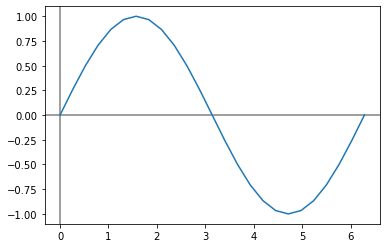

In [43]:
plt.figure(figsize=(6,4))
plt.axhline(c="gray")
plt.axvline(c="gray")
plt.plot(a.detach().numpy(), b.detach().numpy());

In [44]:
c = 2 * b
c

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)

In [46]:
d = c + 1
d

tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)

In [51]:
out = d.sum()
out

tensor(25., grad_fn=<SumBackward0>)

In [53]:
d.grad_fn.next_functions[0][0]
d.grad_fn.next_functions[0][0].next_functions[0][0]

In [54]:
out.backward()

/home/qnarik/miniconda3/envs/exps/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [55]:
a.grad

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])

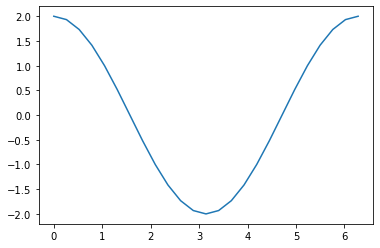

In [56]:
plt.plot(a.detach().numpy(), a.grad.numpy())

# Autograd in training

In [58]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

In [143]:
class TinyModel(nn.Module):
    def __init__(self,
        in_features: int = 1000,
        out_features: int = 10,
        hidden_dim: int = 100
    ) -> None:
        super().__init__() # Initialize self._modules as OrderedDict

        self.l1 = nn.Linear(in_features, hidden_dim)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_dim, out_features)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.l1(x)
        x = self. relu(x)
        x = self.l2(x)

        return x   

In [144]:
x = torch.randn(BATCH_SIZE, DIM_IN)
y = torch.randn(BATCH_SIZE, DIM_OUT)

In [145]:
model = TinyModel()

In [146]:
model

TinyModel(
  (l1): Linear(in_features=1000, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [147]:
model.l2.weight.grad

In [148]:
model.l2.weight.grad_fn

In [149]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [150]:
out = model(x)

In [151]:
model.l1.weight.grad_fn

In [152]:
loss = (y - out).pow(2).mean()

In [153]:
loss

tensor(0.8720, grad_fn=<MeanBackward0>)

In [154]:
print(model.l2.weight.grad_fn)

None


In [155]:
loss.backward()

In [156]:
model.l1.weight.grad

tensor([[ 0.0062,  0.0060,  0.0001,  ..., -0.0007, -0.0071,  0.0120],
        [-0.0061,  0.0018, -0.0209,  ...,  0.0012, -0.0146, -0.0132],
        [-0.0038, -0.0094, -0.0126,  ...,  0.0004,  0.0009, -0.0035],
        ...,
        [ 0.0016,  0.0071,  0.0130,  ...,  0.0150,  0.0006, -0.0017],
        [ 0.0076,  0.0125, -0.0120,  ...,  0.0037, -0.0204,  0.0040],
        [-0.0005, -0.0004,  0.0030,  ...,  0.0016, -0.0016,  0.0002]])

In [157]:
model.l1.weight

Parameter containing:
tensor([[ 0.0160,  0.0163,  0.0109,  ...,  0.0181,  0.0302,  0.0133],
        [ 0.0067, -0.0003, -0.0043,  ...,  0.0042, -0.0165, -0.0105],
        [-0.0279, -0.0133, -0.0035,  ..., -0.0044,  0.0195, -0.0234],
        ...,
        [ 0.0286, -0.0316, -0.0075,  ...,  0.0006, -0.0174, -0.0169],
        [-0.0247,  0.0101, -0.0183,  ...,  0.0117,  0.0128, -0.0246],
        [ 0.0064, -0.0293,  0.0026,  ..., -0.0150, -0.0214, -0.0211]],
       requires_grad=True)

In [168]:
optimizer.step()

In [169]:
model.l1.weight

Parameter containing:
tensor([[ 0.0141,  0.0145,  0.0109,  ...,  0.0183,  0.0323,  0.0097],
        [ 0.0085, -0.0009,  0.0020,  ...,  0.0039, -0.0121, -0.0065],
        [-0.0268, -0.0105,  0.0003,  ..., -0.0045,  0.0193, -0.0223],
        ...,
        [ 0.0281, -0.0337, -0.0114,  ..., -0.0039, -0.0175, -0.0164],
        [-0.0270,  0.0063, -0.0147,  ...,  0.0106,  0.0189, -0.0258],
        [ 0.0065, -0.0292,  0.0017,  ..., -0.0155, -0.0209, -0.0211]],
       requires_grad=True)

In [164]:
optimizer.zero_grad()

In [170]:
model.l1.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

# Turning Autograd Off and On

In [171]:
# temporary switch off
a = torch.randn(2,3, requires_grad=True)
b = torch.randn(2,3, requires_grad=True)

In [173]:
c1 = a+b
c1

tensor([[-0.4025, -0.4631, -1.2466],
        [ 1.7495,  0.0537, -0.3402]], grad_fn=<AddBackward0>)

In [174]:
with torch.no_grad():
    c2 = a + b

In [175]:
c2

tensor([[-0.4025, -0.4631, -1.2466],
        [ 1.7495,  0.0537, -0.3402]])

In [176]:
def add_tensors(x1: torch.Tensor, x2: torch.Tensor) -> torch.Tensor:
    return x1 + x2

In [177]:
@torch.no_grad()
def add_tensors_with_dec(x1: torch.Tensor, x2: torch.Tensor) -> torch.Tensor:
    return x1 + x2

In [178]:
add_tensors(a, b)

tensor([[-0.4025, -0.4631, -1.2466],
        [ 1.7495,  0.0537, -0.3402]], grad_fn=<AddBackward0>)

In [179]:
add_tensors_with_dec(a, b)

tensor([[-0.4025, -0.4631, -1.2466],
        [ 1.7495,  0.0537, -0.3402]])

In [180]:
x = torch.rand(5, requires_grad=True)
x

tensor([0.1818, 0.2574, 0.0108, 0.9572, 0.4731], requires_grad=True)

In [181]:
y = x.detach()
y

tensor([0.1818, 0.2574, 0.0108, 0.9572, 0.4731])

In [182]:
y[0] = 0
y

tensor([0.0000, 0.2574, 0.0108, 0.9572, 0.4731])

In [184]:
# detach return link
x

tensor([0.0000, 0.2574, 0.0108, 0.9572, 0.4731], requires_grad=True)

# Inplace operations

In [185]:
a = torch.linspace(1.,2.,20, requires_grad=True)
a

tensor([1.0000, 1.0526, 1.1053, 1.1579, 1.2105, 1.2632, 1.3158, 1.3684, 1.4211,
        1.4737, 1.5263, 1.5789, 1.6316, 1.6842, 1.7368, 1.7895, 1.8421, 1.8947,
        1.9474, 2.0000], requires_grad=True)

In [186]:
a.sin_()

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

# Autograd Profiler


In [187]:
x = torch.rand(2, 3, requires_grad=True)
y = torch.randn(2, 3, requires_grad=True)
z = torch.ones(2,3, requires_grad=True)

In [188]:
with torch.autograd.profiler.profile(use_cuda=False) as prf:
    for _ in range(1000):
        z = (z / x) * y

STAGE:2023-01-20 02:12:53 438628:438628 ActivityProfilerController.cpp:294] Completed Stage: Warm Up
STAGE:2023-01-20 02:12:53 438628:438628 ActivityProfilerController.cpp:300] Completed Stage: Collection


In [194]:
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        51.35%       1.355ms        51.35%       1.355ms       1.355us          1000  
    aten::mul        48.65%       1.284ms        48.65%       1.284ms       1.284us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 2.639ms



# More Autograd Detail and the High-Level API

In [196]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)    

tensor([ 503.9240, -882.2154,   73.5717], grad_fn=<MulBackward0>)


In [200]:
y.backward(torch.tensor([0.1, 0.01, 0.0001]))

In [207]:
torch.autograd.functional.jacobian(torch.add, (y, x))

(tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
 tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]))

# Checking local gradient

In [198]:
def seed_all(seed: int = 2):
    os.environ['PYTHONHASHSEDD'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [199]:
seed_all(2)

f1 = nn.Linear(2,2)
act = nn.Sigmoid()
loss_fn = nn.BCELoss()

In [200]:
f1.weight, f1.bias

(Parameter containing:
 tensor([[ 0.1622, -0.1683],
         [ 0.1939, -0.0361]], requires_grad=True),
 Parameter containing:
 tensor([0.3021, 0.1683], requires_grad=True))

In [201]:
y = torch.eye(2,2)
y

tensor([[1., 0.],
        [0., 1.]])

In [223]:
out1 = f1(x)
out1.retain_grad()
out2 = act(out1)
out2.retain_grad()
loss = loss_fn(out2, y)

In [203]:
loss

tensor(0.7041, grad_fn=<BinaryCrossEntropyBackward0>)

In [204]:
loss.backward()

In [205]:
x.grad

In [206]:
f1.weight.grad

tensor([[ 0.0560, -0.0137],
        [-0.0286,  0.0501]])

In [207]:
# no updates
f1.weight

Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361]], requires_grad=True)

In [208]:
# dL/dout1
out1.grad

tensor([[-0.1115,  0.1369],
        [ 0.1445, -0.1086]])

In [210]:
# dL/dout2
out2.grad

tensor([[-0.4513,  0.5524],
        [ 0.5926, -0.4420]])

want local gradients like dout1/dout2

In [211]:
out1.backward(out2.grad)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [219]:
# out2.grad.zero_()
out1.grad.zero_()
out1.grad

tensor([[0., 0.],
        [0., 0.]])

In [213]:
# out2.grad.detach_()
out1.grad.detach_()

tensor([[0., 0.],
        [0., 0.]])

In [214]:
out2.grad

tensor([[-0.4513,  0.5524],
        [ 0.5926, -0.4420]])

In [221]:
out1.backward(out2)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [222]:
# local grads
out1.grad

tensor([[0.5540, 0.5474],
        [0.5781, 0.5656]])